## Inversion example using scipy minimize
## Function:
## $$ f(x) = A  e^\frac{-x}{C}$$
## where $ A $ is a signal amplitude, $ C $ is a decay rate


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import symbols, diff
from scipy.optimize import minimize

In [2]:
# forward modelling
def f(x = [0,1],model=[100.5,450e-3],addnoise=True,noise=10.5,seed=100):
    x = np.arange(x[0],x[1],1e-2)
    np.random.seed(seed)
    y = model[0] * np.exp(-x/model[1])
    data = np.array([x,y]).T
    if addnoise == True:
        data_w_noise = np.zeros_like(data)
        data_w_noise[:,0] = data[:,0]
        data_w_noise[:,1] = data[:,1] + np.random.randn(data.shape[0])*noise
        return data_w_noise
    else:
        return data
# the objective function which to be minimized
def objective(model):
    observed_data = f()
    model_data = f(model=model)
    n = model_data.shape[0]
    # we want to minimize the sum of square error
    totalError = np.sum( (observed_data[:,1] - model_data[:,1])**2)
    return totalError/n

In [3]:
objective(model=[100.5,450e-3])

0.0

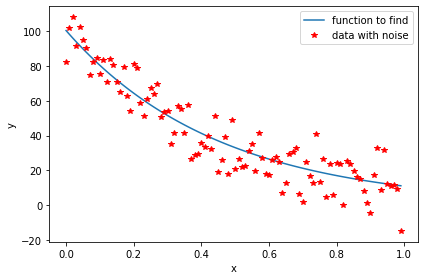

In [4]:
# define true model 
true_model = [100.5,450e-3]
x = [0,1]
true_data = f(model=true_model,x=x,addnoise=False)
true_data_noise = f(model=true_model,x=x,addnoise=True)
# plot data
plt.plot(true_data[:,0],true_data[:,1],label='function to find')
plt.plot(true_data_noise[:,0],true_data_noise[:,1],'r*',label='data with noise')
plt.legend();plt.xlabel('x');plt.ylabel('y'); plt.tight_layout()


In [5]:
# optimization using scipy minimize
bnds = ((1,1000),(0,1)) # bound values for A and C
x0 = [1.,0.1
     ] # initial model
sol = minimize(objective,x0,method='BFGS') #'SLSQP',bounds=bnds)
print (sol)

      fun: 5.335948772301027e-13
 hess_inv: array([[ 4.63591231e+00, -2.38322679e-02],
       [-2.38322679e-02,  2.31224469e-04]])
      jac: array([-3.54623358e-09, -2.73604228e-07])
  message: 'Optimization terminated successfully.'
     nfev: 129
      nit: 18
     njev: 43
   status: 0
  success: True
        x: array([100.50000161,   0.44999998])


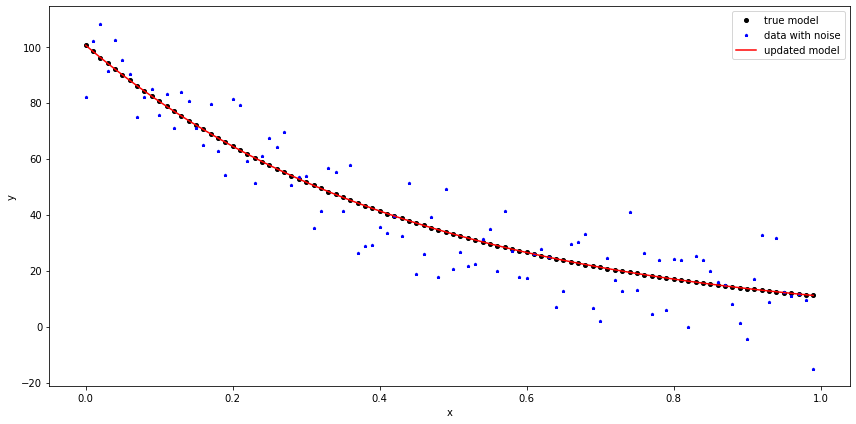

In [7]:
# plot data vs solution
fig = plt.figure(figsize=(12,6))
plt.plot(true_data[:,0],true_data[:,1],'k.',label='true model',markersize=8)
plt.plot(true_data_noise[:,0],true_data_noise[:,1],'b*',\
         label='data with noise',markersize=3)

solution = f(model=[sol.x[0],sol.x[1]],addnoise=False)
plt.plot(solution[:,0],solution[:,1],'r-',label='updated model')
plt.legend();plt.xlabel('x');plt.ylabel('y'); plt.tight_layout()